Coeficiente (w): [0.56360361]
Sesgo (b): -8.454051590217729
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



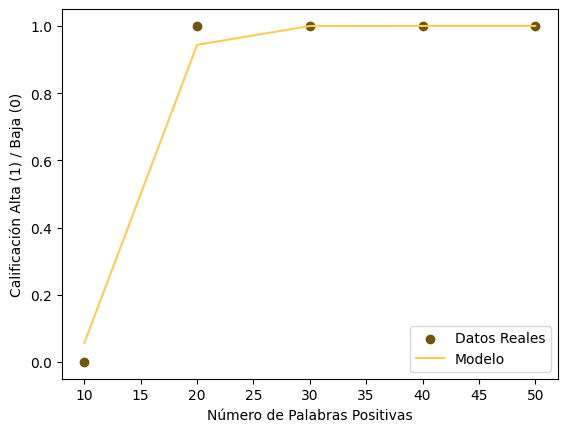

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Suponiendo que ya tienes un DataFrame con tus datos
# Aquí solo usamos datos de ejemplo
data = {
    'positive_word_count': [10, 20, 30, 40, 50],
    'adjusted_rating': [3.5, 4.0, 4.2, 4.5, 4.7]
}

df = pd.DataFrame(data)

# Crear la variable binaria
df['high_rating'] = (df['adjusted_rating'] >= 4.0).astype(int)

# Variables independientes y dependientes
X = df[['positive_word_count']]
y = df['high_rating']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Coeficientes (w) y sesgo (b)
w = model.coef_[0]  # Coeficiente(s)
b = model.intercept_[0]  # Sesgo

print(f"Coeficiente (w): {w}")
print(f"Sesgo (b): {b}")

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
print(classification_report(y_test, y_pred))

# Visualización de los resultados
plt.scatter(df['positive_word_count'], df['high_rating'], color='#71550a', label='Datos Reales')
plt.plot(df['positive_word_count'], model.predict_proba(df[['positive_word_count']])[:,1], color='#fbcd55', label='Modelo')
plt.xlabel('Número de Palabras Positivas')
plt.ylabel('Calificación Alta (1) / Baja (0)')
plt.legend()
plt.show()